### Treść zadania

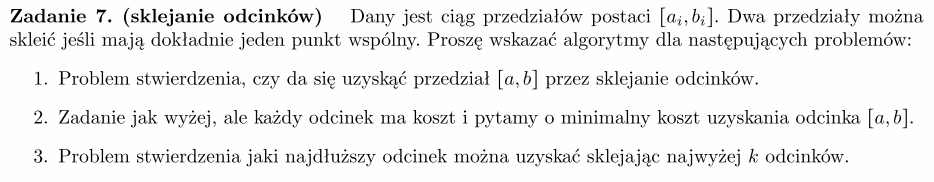

# 1. podpunkt

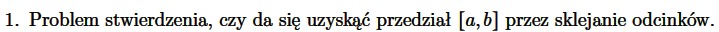

## Implementacja #1
### Tylko dla liczb całkowitych
##### Top - down

### Omówienie

Tworzymy tablicę rozmiaru $ n \times n $, gdzie $ n $ jest wielkością przedziału $ [a, b] $, a dokładniej liczbą liczb całkowitych, jakie do niego należą (łącznie z brzegami). Ponieważ dopuszczamy również liczby ujemne oraz początek przedziału większy od 0, będziemy musieli za każdym razem "przesunąć" wartości do indeksów, które im odpowiadają. Najłatwiej jest sprawdzać w sposób rekurencyjny, czy bieżący przedział, jaki rozważamy w danym momencie, da się otrzymać jako połączenie innych przedziałów z tablicy wejściowej z przedziałami (tablicy $ A $) lub, czy dany przedział znajduje się w tej tablicy (przypadek bazowy - w końcu musimy trafić na przedział z tablicy $ A $, aby móc go połączyć). Najpierw jeszcze, aby przyspieszyć działanie algorytmu, odfiltrowujemy przedziały, które "wystają" poza przedział docelowy $ target $, a więc zaczynają się wcześniej od jego początku lub kończą później niż jego koniec. Aby nie sprawdzać dla każdego przedziału, czy zawarty jest on w tablicy $ A $, w sposób liniowy, posortujemy najpierw odfiltrowane przedziały (możemy wbudowanym sortowaniem po obu współrzędnych), a do sprawdzenia, czy bieżący przedział $ [i, j] $ znajduje się w tablicy z przedziałami, wykorzystamy wyszukiwanie binarne. Nie zmieni to co prawda całkowitej złożoności algorytmu, która wyniesie i tak $ O(n^2) $, ale nieco przyspieszy obliczenia. Jeżeli okaże się, że dany przedział nie znajduje się w tablicy z przedziałami, musimy przebiec po kolejnych indeksach $ k $ takich, że $ i \lt k \lt j $ i znaleźć rekurencyjnie taki podział tego przedziału, że oba otrzymane przedziały będą wynikiem połączenia innych przedziałów z tablicy z odfiltrowanymi przedziałami (lub po prostu całymi przedziałami z tej tablicy).

### Złożoność

###### Obliczeniowa:
$ O(n^2) $ <br>
(względem zakresu wartości w docelowym przedziale, tzn. $ n = b - a + 1 $ jest liczbą liczb całkowitych w przedziale $ [a, b] $)
###### Pamięciowa:
$ O(n^2) $ <br>
(względem zakresu wartości w docelowym przedziale, tzn. $ n = b - a + 1 $ jest liczbą liczb całkowitych w przedziale $ [a, b] $)

In [1]:
def binary_search_first(arr, val):
    l = 0
    r = len(arr) - 1

    while l <= r:
        mid = (l + r) // 2
        if val < arr[mid]:
            r = mid - 1
        else:
            l = mid + 1
            
    return r if r >= 0 and arr[r] == val else -1

# Leave only intervals which can be joined to the target (begin no sooner
# than a target and end no later than a target interval)
def filter_intervals(A: 'array of intervals', target: '[a, b]'):
    A_filtered = []
    
    for span in A:
        if span[0] >= target[0] and span[1] <= target[1]:
            A_filtered.append(span)
            
    return A_filtered


def intervals(A: 'array of intervals', target: '[a, b]') -> bool:
    a, b = target
    c = b - a + 1
    F = [[None] * c for _ in range(c)]
    # Leave only intervals which can be joined to the target one
    A = filter_intervals(A, target)
    # Sort all the intervals by their first coordinate in order
    # to check quicker if an interval is in the intervals array
    A.sort()

    def can_merge(i, j):
        # Return a cached result if exists
        if F[i - a][j - a] is not None: return F[i - a][j - a]
        # Check if we have a whole [i, j] span 
        if binary_search_first(A, [i, j]) >= 0:
            F[i - a][j - a] = True
            return True
        # Else look for a possible split
        F[i - a][j - a] = False
        for k in range(i + 1, j):
            F[i - a][j - a] = can_merge(i, k) and can_merge(k, j)
            if F[i - a][j - a]:
                break
                
        return F[i - a][j - a]
    
    return can_merge(a, b) 

###### Kilka testów

In [2]:
A = [[4, 5], [2, 4], [1, 3], [3, 6], [5, 7], [1, 5], [-5, 2]]

print(intervals(A, [1, 7]))
print(intervals(A, [2, 5]))
print(intervals(A, [-5, 5]))
print(intervals(A, [0, 2]))

True
True
True
False


## Implementacja #2
### Dla dowolnych liczb rzeczywistych
##### Top - down

### Omówienie

###### Co z liczbami rzeczywistymi?
Ponieważ mamy liczby rzeczywiste, musimy najpierw "zmapować" przedziały w taki sposób, aby łatwe było 
zapamiętywanie obliczonych wcześniej wartości w pomocniczej tablicy. Nejlepiej warto odfiltrować zbędne przedziały (te, których napewno nie użyjemy, bo wystają poza przedział docelowy, np. zaczynają się wcześniej od niego lub kończą później od niego). Kolejnym krokiem jest "wypakowanie" wszystkich współrzędnych przedziałów (również docelowego) do jednej tablicy (początki i końce razem) i posortowanie ich niemalejąco. Następnie, ponieważ chcemy przekształcić na jak najbliższe sobie współrzędne naturalne wszystkie rzeczywiste wartości współrzędnych, przy czym, chcemy zachować wzajemny rozkład odcinków (przedziałów) (tzn., jeżeli dwa przedziały zaczynały się lub kończyły na tej samej pozycji, to muszą się dalej zaczynać lub kończyć na tej samej pozycji, która będzie zazwyczaj inna od poprzedniej, ale taka sama dla wszystkich przedziałów, które miały początek/koniec w tym punkcie), więc konieczne jest usunięcie wszystkich powtarzających się współrzędnych z uzyskanej po sortowaniu tablicy. Ostatnim krokiem jest wykonanie samego mapowania. Możemy albo zamienić współrzędne odcinków w miejscu, albo utworzyć nową tablicę odcinków, które będą zmapowanymi odcinkami (przedziałami) z początkowej tablicy. Zrobimy to, przy pomocy algorytmu wyszukiwania binarnego, które znajdzie nam indeks danej rzeczywistej liczby (współrzędnej), czyli nową współrzędną przedziału (jest to przekształcenie jednoznaczne, zachowujące kolejność przedziałów (ale nie ich długości, które ulegają zmianie).
<br><br>
W kolejnym kroku operujemy już tylko na zmapowanych przedziałach (mapujemy również przedział docelowy). Tym razem, jak łatwo możemy zauważyć, uzyskamy tablicę $ F $ rozmiaru maksymalnie $ 2n \cdot 2n $, gdzie $ n $ oznacza liczbę przedziałów, jakie otrzymaliśmy w tablicy wejściowej, ponieważ współrzędne będą maksymalnie z zakresu $ 0, 1, 2, ..., 2n - 1, 2n $ (wynika to z mapowania na kolejne liczby naturalne). Również znika problem z indeksowaniem tablicy $ F $, bo działamy już tylko na liczbach naturalnych. Konieczne jest jeszcze posortowanie tych zmapowanych przedziałów, najpierw po mniej znaczącej współrzędnej (współrzędnej końca), a następnie, po współrzędnej początkowej (nie musimy w tym celu wymyślać żadnych specjalnie skomplikowanych algorytmów, bo operator porównania w Pythonie automatycznie porówna przedziały, które mają taką samą pierwszą współrzędną, w pożądany przez nas sposób, więc wystarczy zastosować zwykłego QuickSorta lub wbudowany algorytm sortowania, jeżeli jest dozwolony). Dalej postępujemy już analogicznie jak w powyższym algorytmie.

###### Ważne uwagi:
Z tego względu, że możemy mieć niewielką liczbę przedziałów o dużym zakresie oraz duży przedział docelowy, I Sposób nie nadaje się za bardzo do większości zastosowań, bo tworzy on dużą tablicę (wielkości rónwej liczbie liczb całkowitych w przedziale $ [a, b] $). Co więcej, nie poradzi on sobie z liczbami rzeczywistymi, więc poniższy algorytm (opisany w tym omówieniu) jest dużo lepszym rozwiązaniem.

### Złożoność

###### Obliczeniowa:
$ O(n^2) $ <br>
(względem liczby przedziałów równej $ n $ - dużo lepsza złożoność - prawdziwie wielomianowa)
###### Pamięciowa:
$ O(n^2) $ <br>
(względem liczby przedziałów równej $ n $ - dużo lepsza złożoność - prawdziwie wielomianowa)

In [3]:
def quick_sort(arr):
    _quick_sort(arr, 0, len(arr) - 1)
    

def _quick_sort(arr, left_idx, right_idx):
    while left_idx < right_idx:
        pivot_position = _partition(arr, left_idx, right_idx)
        
        if pivot_position - left_idx < right_idx - pivot_position:
            _quick_sort(arr, left_idx, pivot_position)
            left_idx = pivot_position + 1
        else:
            _quick_sort(arr, pivot_position + 1, right_idx)
            right_idx = pivot_position
        
        
def _partition(arr, left_idx, right_idx):
    pivot = arr[left_idx]
    i = left_idx - 1
    j = right_idx + 1
    while True:
        i += 1
        while arr[i] < pivot: i += 1
            
        j -= 1
        while arr[j] > pivot: j -= 1
        
        if i < j:
            _swap(arr, i, j)
        else:
            return j

    
def _swap(arr, i, j):
    arr[i], arr[j] = arr[j], arr[i]
    
    
def remove_duplicates(A):
    res = [A[0]]
    for i in range(1, len(A)):
        if A[i] != A[i - 1]:
            res.append(A[i])
    return res
    
    
def binary_search_first(arr: 'sorted sequence', el: 'searched element') -> int:
    left_idx = 0
    right_idx = len(arr)-1
    
    while left_idx <= right_idx:
        mid_idx = (left_idx + right_idx) // 2
        if el > arr[mid_idx]:
            left_idx = mid_idx + 1
        else:
            right_idx = mid_idx - 1
            
    return left_idx if left_idx < len(arr) and arr[left_idx] == el else -1


def map_span(span: 'span to map', C: 'array of sorted coordinates'):
    a = binary_search_first(C, span[0])
    b = binary_search_first(C, span[1])
    return [a, b]

    
def map_spans(A: 'array of spans', C: 'array of sorted coordinates'):
    res = []
    for span in A:
        res.append(map_span(span, C))
    return res
    

def prepare_intervals(A: 'array of intervals', target: 'target interval'):
    """
    This function filters intervals which cannot be a part of the resulting
    interval and maps coordinates of each valid interval to a proper natural number.
    """
    # Filter intervals which don't need to be checked (and unpack all valid coordinates)
    C = [target[0], target[1]]
    A_cp = []
    for span in A:
        if span[0] >= target[0] and span[1] <= target[1]:
            C.append(span[0])
            C.append(span[1])
            A_cp.append(span)
    A = A_cp
    # Sort an array of coordinates
    quick_sort(C)
    # Remove duplicates
    C = remove_duplicates(C)
    # Map all coordinates of all the intervals to natural numbers using a Binary Search
    # (we will look for an index of a coordinate in a C array and replace this coordinate
    # with an index found)
    target = map_span(target, C)
    A = map_spans(A, C)
    return A, target
    
    
def intervals(A: 'array of intervals', target: 'target interval') -> bool:
    A, target = prepare_intervals(A, target)
    n = target[1] + 1  # All indices will be from range 0, 1, ..., target[1] - 1, target[1] 
    F = [[None] * n for _ in range(n)]
    
    # Sort an array of spans in order to use Binary Search for checking if
    # a span is included in A
    quick_sort(A)
    
    def can_merge(i, j):
        if F[i][j] is None:
            if binary_search_first(A, [i, j]) >= 0:
                F[i][j] = True
            else:
                # Set False as a placeholder value (by default we can't find intervals such
                # that can be merged to the [i, j] interval and then we search for a possible
                # solution).
                F[i][j] = False
                for k in range(i + 1, j):
                    F[i][j] = can_merge(i, k) and can_merge(k, j) 
                    if F[i][j]:
                        break
        return F[i][j]

    can_merge(target[0], target[1])
#     print(*F, sep='\n')
        
    return F[0][target[1]]  # target[0] = 0 - always after filtering intervals

###### Kilka testów

In [4]:
A = [[4.1, 5.2], [2.15, 4.4], [1.5, 3.2], [3.2, 6.83], [5.2, 7.1], [1.2, 5.2], [-5.75, 2.15]]

# print(prepare_intervals(A, [1.2, 7.1]))
print(intervals(A, [1.2, 7.1]))
print(intervals(A, [-5.75, 4.4]))
print(intervals(A, [-5.75, 6.83]))

True
True
False


# 2. podpunkt

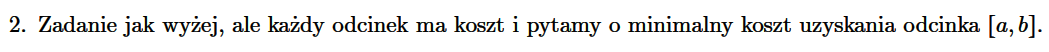

## Implementacja
### Dla dowolnych liczb rzeczywistych
##### Top - down

### Omówienie

Początek jest podobny jak wyżej, ale zapamiętujemy również koszt przyporządkowany danemu odcinkowi (jako trzecią wartość w tablicy, reprezentującej odcinek, postaci: $ [a, b, c] $, gdzie $ a $ - początek odcinka, $ b $ - koniec odcinka, $ c $ - koszt przyporządkowany odcinkowi). Następnie, zamiast tworzyć tablicę prawdy (zapisywać wartości $ True $ oraz $ False $ w tablicy $ F $), będziemy na każdej pozycji $ F[i][j] $ zapisywać minimalny koszt uzyskania odcinka $ [i, j] $ lub wartość $ \infty $, jeżeli danego odcinka nie da się utworzyć. Zadanie proste, jak już zrobi się powyższe.

###### UWAGA:
Możemy sortować odcinki po trzech wartościach przy takim zapisie, bo jeżeli będzie kilka, które się pokrywają, to najpierw zostaną wzięte te, które mają najniższy koszt. Również można my je odfiltrować, zostawiając tylko ten najtańszy, co również uczynimy.
<br><br>
Konieczne jest również zmodyfikowanie algorytmu wyszukiwania binarnego, by nie porównywał całych tablic, reprezentujących przedziały, tylko ich współrzędne (nie koszty, bo i tak usuniemy te o większym koszcie - patrz wyżej).

### Złożoność

###### Obliczeniowa:
$ O(n^2) $ <br>
(względem liczby przedziałów równej $ n $ - dużo lepsza złożoność - prawdziwie wielomianowa)
###### Pamięciowa:
$ O(n^2) $ <br>
(względem liczby przedziałów równej $ n $ - dużo lepsza złożoność - prawdziwie wielomianowa)

In [5]:
def quick_sort(arr):
    if len(arr) < 2: return arr
    _quick_sort(arr, 0, len(arr) - 1)
    

def _quick_sort(arr, left_idx, right_idx):
    while left_idx < right_idx:
        pivot_position = _partition(arr, left_idx, right_idx)
        
        if pivot_position - left_idx < right_idx - pivot_position:
            _quick_sort(arr, left_idx, pivot_position)
            left_idx = pivot_position + 1
        else:
            _quick_sort(arr, pivot_position + 1, right_idx)
            right_idx = pivot_position
        
        
def _partition(arr, left_idx, right_idx):
    pivot = arr[left_idx]
    i = left_idx - 1
    j = right_idx + 1
    while True:
        i += 1
        while arr[i] < pivot: i += 1
            
        j -= 1
        while arr[j] > pivot: j -= 1
        
        if i < j:
            _swap(arr, i, j)
        else:
            return j

    
def _swap(arr, i, j):
    arr[i], arr[j] = arr[j], arr[i]
    
    
def remove_duplicates(A: 'array of sorted numbers'):
    if not A: return []
    res = [A[0]]
    for i in range(1, len(A)):
        if A[i] != A[i - 1]:
            res.append(A[i])
    return res


def remove_redundant_spans(A: 'array of spans sorted by first, second coordinate and cost'):
    if not A: return []
    res = [A[0]]
    for i in range(1, len(A)):
        # If have the same coordinates (both coordinates), the first one has lower
        # cost than the next one, so remove all the spans with the same coordinates and
        # greater costs than the first one
        if A[i - 1][0] == A[i][0] and A[i - 1][1] == A[i][1]:
            continue
        res.append(A[i])
    return res

    
def binary_search_first(arr: 'sorted sequence', el: 'searched element', fn=lambda x: x) -> int:
    left_idx = 0
    right_idx = len(arr)-1
    
    while left_idx <= right_idx:
        mid_idx = (left_idx + right_idx) // 2
        if el > fn(arr[mid_idx]):
            left_idx = mid_idx + 1
        else:
            right_idx = mid_idx - 1
            
    return left_idx if left_idx < len(arr) and fn(arr[left_idx]) == el else -1

    
def map_spans(A: 'array of spans', C: 'array of sorted coordinates'):
    res = []
    for span in A:
        a = binary_search_first(C, span[0])
        b = binary_search_first(C, span[1])
        c = span[2]  # Cost will be unchanged
        res.append([a, b, c])
    return res
    

def prepare_intervals(A: 'array of intervals', target: 'target interval'):
    """
    This function filters intervals which cannot be a part of the resulting
    interval and maps coordinates of each valid interval to a proper natural number.
    """
    # Filter intervals which don't need to be checked (and unpack all valid coordinates)
    C = [target[0], target[1]]
    A_cp = []
    for span in A:
        if span[0] >= target[0] and span[1] <= target[1]:
            C.append(span[0])
            C.append(span[1])
            A_cp.append(span)
    A = A_cp
    # Sort an array of coordinates
    quick_sort(C)
    # Remove duplicates
    C = remove_duplicates(C)
    # Map all coordinates of all the intervals to natural numbers using a Binary Search
    # (we will look for an index of a coordinate in a C array and replace this coordinate
    # with an index found)
    target = [binary_search_first(C, target[0]), binary_search_first(C, target[1])]
    A = map_spans(A, C)
    
    return A, target
    
    
def min_cost_merge(A: 'array of intervals', target: 'target interval'):
    A, target = prepare_intervals(A, target)
    n = target[1] + 1  # All indices will be from range 0, 1, ..., target[1] - 1, target[1]
    INF = float('inf')
    F = [[None] * n for _ in range(n)]
    
    # Sort an array of spans in order to use Binary Search for checking if
    # a span is included in A
    quick_sort(A)
    # Remove redundant spans (these which have the same coordinates as some other but greater
    # cost than they have)
    A = remove_redundant_spans(A)
    fn = lambda span: [span[0], span[1]]
    
#     print(A, target)
    
    def recur(i, j):
        if F[i][j] is None:
            idx = binary_search_first(A, [i, j], fn)
            if idx >= 0:
                F[i][j] = A[idx][2]
            else:
                # Set infinity as a placeholder value (by default we can't find intervals such
                # that can be merged to the [i, j] interval nad then we search for a possible
                # solution).
                F[i][j] = INF
                
            for k in range(i + 1, j):
                F[i][j] = min(F[i][j], recur(i, k) + recur(k, j))
                
#             print('min for', [i, j], F[i][j])
                
        return F[i][j]

    recur(target[0], target[1])
#     print(*F, sep='\n')
        
    return F[0][target[1]]

###### Kilka testów

In [6]:
A = [[7.1, 9.2, 1.3], 
     [9.2, 11, 0], 
     [5.2, 11, 7.3], 
     [-5.2, 5.2, 6.2], 
     [5.2, 7.1, 9], 
     [1.5, 5.2, 3], 
     [9.2, 11, 20]
]

print(min_cost_merge(A, [1.5, 11]))
print(min_cost_merge(A, [-5.2, 11]))

10.3
13.5


# 3. podpunkt

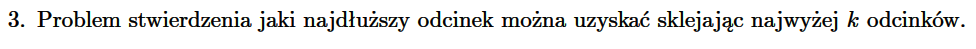

## Implementacja
### Dla dowolnych liczb rzeczywistych
##### Top - down

### Omówienie

Analogicznie jak wyżej, ale tym razem jako koszt (czy tak jakkolwiek nazwany 3. parametr) traktujemy długość odcinka (początkową - przed zmapowaniem) i chcemy ją zmaksymalizować, a nie zminimalizować, jak miało to miejsce wyżej.

### Złożoność

###### Obliczeniowa:
$ O(n^2) $ <br>
(względem liczby przedziałów równej $ n $ - dużo lepsza złożoność - prawdziwie wielomianowa)
###### Pamięciowa:
$ O(n^2) $ <br>
(względem liczby przedziałów równej $ n $ - dużo lepsza złożoność - prawdziwie wielomianowa)

In [7]:
def quick_sort(arr):
    if len(arr) < 2: return arr
    _quick_sort(arr, 0, len(arr) - 1)
    

def _quick_sort(arr, left_idx, right_idx):
    while left_idx < right_idx:
        pivot_position = _partition(arr, left_idx, right_idx)
        
        if pivot_position - left_idx < right_idx - pivot_position:
            _quick_sort(arr, left_idx, pivot_position)
            left_idx = pivot_position + 1
        else:
            _quick_sort(arr, pivot_position + 1, right_idx)
            right_idx = pivot_position
        
        
def _partition(arr, left_idx, right_idx):
    pivot = arr[left_idx]
    i = left_idx - 1
    j = right_idx + 1
    while True:
        i += 1
        while arr[i] < pivot: i += 1
            
        j -= 1
        while arr[j] > pivot: j -= 1
        
        if i < j:
            _swap(arr, i, j)
        else:
            return j

    
def _swap(arr, i, j):
    arr[i], arr[j] = arr[j], arr[i]
    
    
def remove_duplicates(A: 'array of sorted numbers'):
    if not A: return []
    res = [A[0]]
    for i in range(1, len(A)):
        if A[i] != A[i - 1]:
            res.append(A[i])
    return res


def remove_duplicated_spans(A: 'array of spans sorted by first, second coordinate and length'):
    if not A: return []
    res = [A[0]]
    for i in range(1, len(A)):
        # If have the same coordinates (both coordinates), both of them have the same length,
        # so we will filter them out
        if A[i - 1][0] == A[i][0] and A[i - 1][1] == A[i][1]:
            continue
        res.append(A[i])
    return res

    
def binary_search_first(arr: 'sorted sequence', el: 'searched element', fn=lambda x: x) -> int:
    left_idx = 0
    right_idx = len(arr)-1
    
    while left_idx <= right_idx:
        mid_idx = (left_idx + right_idx) // 2
        if el > fn(arr[mid_idx]):
            left_idx = mid_idx + 1
        else:
            right_idx = mid_idx - 1
            
    return left_idx if left_idx < len(arr) and fn(arr[left_idx]) == el else -1

    
def map_spans(A: 'array of spans', C: 'array of sorted coordinates'):
    res = []
    for span in A:
        a = binary_search_first(C, span[0])
        b = binary_search_first(C, span[1])
        l = span[1] - span[0]  # Length will be unchanged
        res.append([a, b, l])
    return res
    

def prepare_intervals(A: 'array of intervals'):
    """
    This function maps coordinates of intervals to the natural number coordinates and
    removes duplicated intervals
    """
    # Unpack all coordinates
    C = []
    for span in A:
        C.append(span[0])
        C.append(span[1])
    # Sort an array of coordinates
    quick_sort(C)
    # Remove duplicates
    C = remove_duplicates(C)
    # Map all coordinates of all the intervals to natural numbers using a Binary Search
    # (we will look for an index of a coordinate in a C array and replace this coordinate
    # with an index found)
    A = map_spans(A, C)
    
    return A
    
    
def max_length_merge(A: 'array of intervals'):
    A = prepare_intervals(A)
    A = remove_duplicated_spans(A)
    n = len(A)
    # An array will have at most 2n x 2n elements (spans)
    F = [[None] * (2 * n) for _ in range(2 * n)]
    
    # Sort an array of spans in order to use Binary Search for checking if
    # a span is included in A
    quick_sort(A)
    fn = lambda span: [span[0], span[1]]
    global_max = 0
    
    def recur(i, j):
        if F[i][j] is None:
            nonlocal global_max
            idx = binary_search_first(A, [i, j], fn)
            if idx >= 0:
                F[i][j] = A[idx][2]
            # This time we will look for a split only if there is no span found above
            # (as finding spans which after merging will give the same span as above
            # is pointless because it will have the same length)
            else:
                # Set 0 as a placeholder value (by default we can't find intervals such
                # that can be merged to the [i, j] interval nad then we search for a possible
                # solution).
                F[i][j] = float('-inf')
                
                for k in range(i + 1, j):
                    F[i][j] = max(F[i][j], recur(i, k) + recur(k, j))
            
            global_max = max(global_max, F[i][j])
            
        return F[i][j]

    recur(0, 2 * n - 1)
    print(*F, sep='\n')
        
    return global_max

###### Kilka testów

In [8]:
A = [[4.1, 5.2], [2.15, 4.4], [1.5, 3.2], [3.2, 6.83], [5.2, 7.1], [1.2, 5.2], [-5.75, 2.15]]
#                     ^                                                               ^

print(max_length_merge(A))

[None, -inf, -inf, 7.9, -inf, -inf, 10.15, -inf, -inf, -inf, -inf, -inf, -inf, -inf]
[None, None, -inf, -inf, -inf, -inf, -inf, 4.0, -inf, 5.8999999999999995, -inf, -inf, -inf, -inf]
[None, None, None, -inf, 1.7000000000000002, -inf, -inf, -inf, 5.33, -inf, -inf, -inf, -inf, -inf]
[None, None, None, None, -inf, -inf, 2.2500000000000004, -inf, -inf, -inf, -inf, -inf, -inf, -inf]
[None, None, None, None, None, -inf, -inf, -inf, 3.63, -inf, -inf, -inf, -inf, -inf]
[None, None, None, None, None, None, -inf, 1.1000000000000005, -inf, 3.0, -inf, -inf, -inf, -inf]
[None, None, None, None, None, None, None, -inf, -inf, -inf, -inf, -inf, -inf, -inf]
[None, None, None, None, None, None, None, None, -inf, 1.8999999999999995, -inf, -inf, -inf, -inf]
[None, None, None, None, None, None, None, None, None, -inf, -inf, -inf, -inf, -inf]
[None, None, None, None, None, None, None, None, None, None, -inf, -inf, -inf, -inf]
[None, None, None, None, None, None, None, None, None, None, None, -inf, -inf, -in